### Tarea 2 Regresión No Lineal y Múltiple -Estuardo Funes Solares 20032042

### Parte 1 - Modelo exponencial de covid-19 usando feature-eng

In [80]:
# Tratamiento de datos
import numpy as np
import pandas as pd

# Gráficos
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# Configuración warnings
import warnings
warnings.filterwarnings('ignore')

#Otros
from scipy.stats import norm
import tensorflow as tf
import datetime

In [228]:
# CONSTANTES
LEARNING_RATE = 0.0001
EPOCH = 5

#### Carga y Visualización de archivo

In [192]:
covid19_data = pd.read_csv(r"C:\Users\EFunes\Documents\PERSONAL\U\Galileo\II Ciclo\Statistical Learning I\Tareas\Tarea2\covid_19_clean_complete.csv")
covid19_data

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
0,NaN,Afghanistan,33.000000,65.000000,1/22/20,0,0,0
1,NaN,Albania,41.153300,20.168300,1/22/20,0,0,0
2,NaN,Algeria,28.033900,1.659600,1/22/20,0,0,0
3,NaN,Andorra,42.506300,1.521800,1/22/20,0,0,0
4,NaN,Angola,-11.202700,17.873900,1/22/20,0,0,0
...,...,...,...,...,...,...,...,...
29035,NaN,Western Sahara,24.215500,-12.885800,5/10/20,6,0,5
29036,NaN,Sao Tome and Principe,0.186360,6.613081,5/10/20,208,5,4
29037,NaN,Yemen,15.552727,48.516388,5/10/20,51,8,1
29038,NaN,Comoros,-11.645500,43.333300,5/10/20,11,1,0


#### Convertir campo Date a datetime64

In [193]:
covid19_data["Date"] = pd.to_datetime(covid19_data["Date"],infer_datetime_format = True)
covid19_data.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
0,NaN,Afghanistan,33.0000,65.0000,2020-01-22,0,0,0
1,NaN,Albania,41.1533,20.1683,2020-01-22,0,0,0
2,NaN,Algeria,28.0339,1.6596,2020-01-22,0,0,0
3,NaN,Andorra,42.5063,1.5218,2020-01-22,0,0,0
4,NaN,Angola,-11.2027,17.8739,2020-01-22,0,0,0


In [194]:
covid19_data.dtypes

Province/State            object
Country/Region            object
Lat                      float64
Long                     float64
Date              datetime64[ns]
Confirmed                  int64
Deaths                     int64
Recovered                  int64
dtype: object

In [195]:
covid19_data["Anio"] = covid19_data["Date"].dt.year

In [196]:
covid19_data["Anio"].unique()

array([2020], dtype=int64)

In [197]:
covid19_data["Mes"] = covid19_data["Date"].dt.month

In [198]:
covid19_data["Mes"].unique()

array([1, 2, 3, 4, 5], dtype=int64)

In [199]:
covid19_data["Dia"] = covid19_data["Date"].dt.day

In [200]:
covid19_data["Dia"].unique()

array([22, 23, 24, 25, 26, 27, 28, 29, 30, 31,  1,  2,  3,  4,  5,  6,  7,
        8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21],
      dtype=int64)

#### Se ordena la data según el campo DATE

In [201]:
 covid19_data.sort_values("Date")

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Anio,Mes,Dia
0,NaN,Afghanistan,33.000000,65.000000,2020-01-22,0,0,0,2020,1,22
167,Curacao,Netherlands,12.169600,-68.990000,2020-01-22,0,0,0,2020,1,22
168,Sint Maarten,Netherlands,18.042500,-63.054800,2020-01-22,0,0,0,2020,1,22
169,NaN,Netherlands,52.132600,5.291300,2020-01-22,0,0,0,2020,1,22
170,NaN,New Zealand,-40.900600,174.886000,2020-01-22,0,0,0,2020,1,22
...,...,...,...,...,...,...,...,...,...,...,...
28869,Greenland,Denmark,71.706900,-42.604300,2020-05-10,11,0,11,2020,5,10
28870,NaN,Denmark,56.263900,9.501800,2020-05-10,10429,529,8217,2020,5,10
28871,NaN,Djibouti,11.825100,42.590300,2020-05-10,1210,3,847,2020,5,10
28857,Zhejiang,China,29.183200,120.093400,2020-05-10,1268,1,1267,2020,5,10


In [202]:
covid19_data['Numero_Dia'] = covid19_data['Mes'].astype(str) + covid19_data['Dia'].astype(str)

In [203]:
covid19_data.sort_values("Date")

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Anio,Mes,Dia,Numero_Dia
0,NaN,Afghanistan,33.000000,65.000000,2020-01-22,0,0,0,2020,1,22,122
167,Curacao,Netherlands,12.169600,-68.990000,2020-01-22,0,0,0,2020,1,22,122
168,Sint Maarten,Netherlands,18.042500,-63.054800,2020-01-22,0,0,0,2020,1,22,122
169,NaN,Netherlands,52.132600,5.291300,2020-01-22,0,0,0,2020,1,22,122
170,NaN,New Zealand,-40.900600,174.886000,2020-01-22,0,0,0,2020,1,22,122
...,...,...,...,...,...,...,...,...,...,...,...,...
28869,Greenland,Denmark,71.706900,-42.604300,2020-05-10,11,0,11,2020,5,10,510
28870,NaN,Denmark,56.263900,9.501800,2020-05-10,10429,529,8217,2020,5,10,510
28871,NaN,Djibouti,11.825100,42.590300,2020-05-10,1210,3,847,2020,5,10,510
28857,Zhejiang,China,29.183200,120.093400,2020-05-10,1268,1,1267,2020,5,10,510


#### Convertir la fecha a un entero "número de día", por ejemplo si se usan datos desde el 22 de abril, este es el día 0, el 23 es el día 1

In [204]:
n = len(pd.unique(covid19_data['Numero_Dia']))
print(n)

110


In [205]:
covid19_data["Numero_Dia"].unique()

array(['122', '123', '124', '125', '126', '127', '128', '129', '130',
       '131', '21', '22', '23', '24', '25', '26', '27', '28', '29', '210',
       '211', '212', '213', '214', '215', '216', '217', '218', '219',
       '220', '221', '222', '223', '224', '225', '226', '227', '228',
       '229', '31', '32', '33', '34', '35', '36', '37', '38', '39', '310',
       '311', '312', '313', '314', '315', '316', '317', '318', '319',
       '320', '321', '322', '323', '324', '325', '326', '327', '328',
       '329', '330', '331', '41', '42', '43', '44', '45', '46', '47',
       '48', '49', '410', '411', '412', '413', '414', '415', '416', '417',
       '418', '419', '420', '421', '422', '423', '424', '425', '426',
       '427', '428', '429', '430', '51', '52', '53', '54', '55', '56',
       '57', '58', '59', '510'], dtype=object)

In [206]:
covid19_data["Numero_Dia"].replace({"122":0, "123":1, "124":2, "125":3, "126":4, "127":5, "128":6, "129":7, "130":8, "131":9,
                                "21":10, "22":11, "23":12, "24":13, "25":14, "26":15, "27":16, "28":17, "29":18, 
                                "210":19, "211":20, "212":21, "213":22, "214":23, "215":24, "216":25, "217":26, "218":27, 
                                "219":28, "220":29, "221":30, "222":31, "223":32, "224":33, "225":34, "226":35, "227":36, 
                                "228":37, "229":38, "31":39, "32":40, "33":41, "34":42, "35":43, "36":44, "37":45, 
                                "38":46, "39":47, "310":48, "311":49, "312":50, "313":51, "314":52, "315":53, "316":54, 
                                "317":55, "318":56, "319":57, "320":58, "321":59, "322":60, "323":61, "324":62, "325":63, 
                                "326":64, "327":65, "328":66, "329":67, "330":68, "331":69, "41":70, "42":71, "43":72, 
                                "44":73, "45":74, "46":75, "47":76, "48":77, "49":78, "410":79, "411":80, "412":81, 
                                "413":82, "414":83, "415":84, "416":85, "417":86, "418":87, "419":88, "420":89, "421":90, 
                                "422":91, "423":92, "424":93, "425":94, "426":95, "427":96, "428":97, "429":98, "430":99, 
                                "51":100, "52":101, "53":102, "54":103, "55":104, "56":105, "57":106, "58":107, 
                                "59":108, "510":109 }, inplace = True)

In [207]:
covid19_data

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Anio,Mes,Dia,Numero_Dia
0,NaN,Afghanistan,33.000000,65.000000,2020-01-22,0,0,0,2020,1,22,0
1,NaN,Albania,41.153300,20.168300,2020-01-22,0,0,0,2020,1,22,0
2,NaN,Algeria,28.033900,1.659600,2020-01-22,0,0,0,2020,1,22,0
3,NaN,Andorra,42.506300,1.521800,2020-01-22,0,0,0,2020,1,22,0
4,NaN,Angola,-11.202700,17.873900,2020-01-22,0,0,0,2020,1,22,0
...,...,...,...,...,...,...,...,...,...,...,...,...
29035,NaN,Western Sahara,24.215500,-12.885800,2020-05-10,6,0,5,2020,5,10,109
29036,NaN,Sao Tome and Principe,0.186360,6.613081,2020-05-10,208,5,4,2020,5,10,109
29037,NaN,Yemen,15.552727,48.516388,2020-05-10,51,8,1,2020,5,10,109
29038,NaN,Comoros,-11.645500,43.333300,2020-05-10,11,1,0,2020,5,10,109


In [ ]:
# Se saca un subset del dataframe para ver las variables que nos interesan.

In [208]:
covid19_data_resumen = pd.concat([covid19_data['Date'], covid19_data['Numero_Dia'], covid19_data['Confirmed']], axis=1)
covid19_data_resumen

,Date,Numero_Dia,Confirmed
0,2020-01-22,0,0
1,2020-01-22,0,0
2,2020-01-22,0,0
3,2020-01-22,0,0
4,2020-01-22,0,0
...,...,...,...
29035,2020-05-10,109,6
29036,2020-05-10,109,208
29037,2020-05-10,109,51
29038,2020-05-10,109,11


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='Numero_Dia', ylabel='Confirmed'>

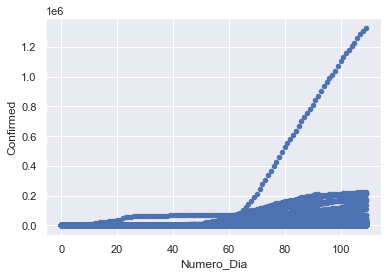

In [209]:
covid19_data.plot.scatter(x = "Numero_Dia",y="Confirmed")

#### Grafica Data original

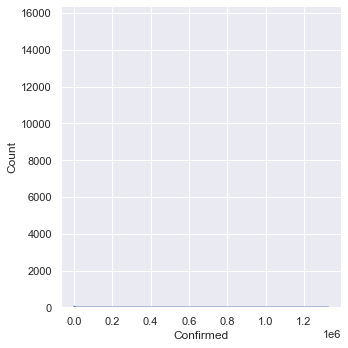

In [210]:
sns.displot(covid19_data['Confirmed'],kde=True);

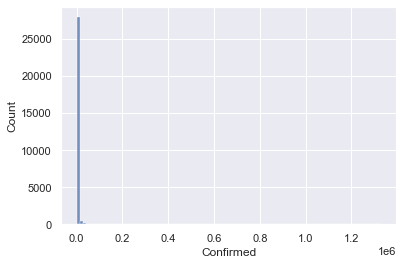

In [211]:
sns.histplot(x='Confirmed', data=covid19_data, bins=100);

#### Aplicar regresión lineal sobre la variable "Confirmed" transformada.

In [183]:
covid19_data['Confirmed']=np.log((covid19_data['Confirmed']))

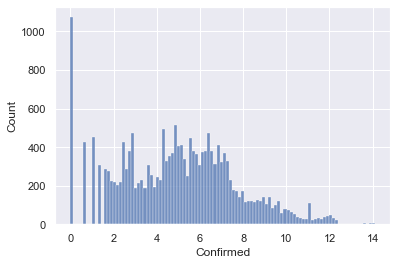

In [185]:
#Log Transformation
sns.histplot(x='Confirmed', data=covid19_data, bins=100);

#### Grafica Data Transformada con Log

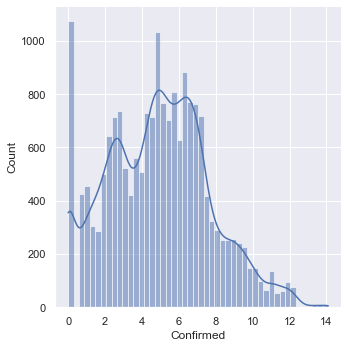

In [186]:
sns.displot(covid19_data['Confirmed'],kde=True);

In [187]:
covid19_data

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Anio,Mes,Dia,Numero_Dia
0,NaN,Afghanistan,33.000000,65.000000,2020-01-22,-inf,0,0,2020,1,22,0
1,NaN,Albania,41.153300,20.168300,2020-01-22,-inf,0,0,2020,1,22,0
2,NaN,Algeria,28.033900,1.659600,2020-01-22,-inf,0,0,2020,1,22,0
3,NaN,Andorra,42.506300,1.521800,2020-01-22,-inf,0,0,2020,1,22,0
4,NaN,Angola,-11.202700,17.873900,2020-01-22,-inf,0,0,2020,1,22,0
...,...,...,...,...,...,...,...,...,...,...,...,...
29035,NaN,Western Sahara,24.215500,-12.885800,2020-05-10,1.791759,0,5,2020,5,10,109
29036,NaN,Sao Tome and Principe,0.186360,6.613081,2020-05-10,5.337538,5,4,2020,5,10,109
29037,NaN,Yemen,15.552727,48.516388,2020-05-10,3.931826,8,1,2020,5,10,109
29038,NaN,Comoros,-11.645500,43.333300,2020-05-10,2.397895,1,0,2020,5,10,109


In [188]:
covid19_data_resumen = pd.concat([covid19_data['Date'], covid19_data['Numero_Dia'], covid19_data['Confirmed']], axis=1)
covid19_data_resumen

,Date,Numero_Dia,Confirmed
0,2020-01-22,0,-inf
1,2020-01-22,0,-inf
2,2020-01-22,0,-inf
3,2020-01-22,0,-inf
4,2020-01-22,0,-inf
...,...,...,...
29035,2020-05-10,109,1.791759
29036,2020-05-10,109,5.337538
29037,2020-05-10,109,3.931826
29038,2020-05-10,109,2.397895


In [218]:
# Using DataFrame.isin() to Create Filter
df_filter = covid19_data_resumen.isin([np.nan, np.inf, -np.inf])
# Mask df with the filter
covid19_data_resumen = covid19_data_resumen[~df_filter]
covid19_data_resumen.dropna(inplace=True)
covid19_data_resumen

,Date,Numero_Dia,Confirmed
0,2020-01-22,0,0
1,2020-01-22,0,0
2,2020-01-22,0,0
3,2020-01-22,0,0
4,2020-01-22,0,0
...,...,...,...
29035,2020-05-10,109,6
29036,2020-05-10,109,208
29037,2020-05-10,109,51
29038,2020-05-10,109,11


In [219]:
correlacion = covid19_data.corr()
correlacion

,Lat,Long,Confirmed,Deaths,Recovered,Anio,Mes,Dia,Numero_Dia
Lat,1.000000e+00,-1.286400e-01,0.070786,0.079389,0.074911,NaN,1.048034e-15,2.348705e-16,1.203476e-15
Long,-1.286400e-01,1.000000e+00,-0.054431,-0.055812,-0.006442,NaN,2.845548e-16,-9.695941e-17,2.903476e-16
Confirmed,7.078627e-02,-5.443118e-02,1.000000,0.923444,0.756494,NaN,1.162829e-01,-1.363714e-02,1.205687e-01
Deaths,7.938884e-02,-5.581213e-02,0.923444,1.000000,0.744929,NaN,1.168640e-01,-1.312745e-02,1.213729e-01
Recovered,7.491127e-02,-6.441946e-03,0.756494,0.744929,1.000000,NaN,1.471256e-01,-2.113994e-02,1.513567e-01
Anio,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mes,1.048034e-15,2.845548e-16,0.116283,0.116864,0.147126,NaN,1.000000e+00,-3.597325e-01,9.639064e-01
Dia,2.348705e-16,-9.695941e-17,-0.013637,-0.013127,-0.021140,NaN,-3.597325e-01,1.000000e+00,-9.868220e-02
Numero_Dia,1.203476e-15,2.903476e-16,0.120569,0.121373,0.151357,NaN,9.639064e-01,-9.868220e-02,1.000000e+00


In [233]:
# Correlación lineal entre las dos variables

corr_test = pearsonr(x = covid19_data_resumen['Numero_Dia'], y =  covid19_data_resumen['Confirmed'])
print("Coeficiente de correlación de Pearson: ", corr_test[0])
print("P-value: ", corr_test[1])

Coeficiente de correlación de Pearson:  0.12056865330633779
P-value:  1.792002934335177e-94


In [234]:
# División de los datos en train y test

X = covid19_data_resumen[['Numero_Dia']]
y = covid19_data_resumen['Confirmed']

X_train, X_test, y_train, y_test = train_test_split(
                                        X.values.reshape(-1,1),
                                        y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

# Creación del modelo

modelo = LinearRegression()
modelo.fit(X = X_train.reshape(-1, 1), y = y_train)

LinearRegression()

In [235]:
# Información del modelo

print("Intercept:", modelo.intercept_)
print("Coeficiente:", list(zip(X.columns, modelo.coef_.flatten(), )))
print("Coeficiente de determinación R^2:", modelo.score(X, y))

Intercept: [-3650.42145592]
Coeficiente: [('Numero_Dia', 138.00503673943575)]
Coeficiente de determinación R^2: 0.01452575924699473


In [236]:
# Error de test del modelo 

predicciones = modelo.predict(X = X_test)
print(predicciones[0:3,])

rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = predicciones,
        squared = False
       )
print("")
print(f"El error (rmse) de test es: {rmse}")

[[-1718.35094156]
 [ 2283.79512388]
 [ 3249.83038106]]

El error (rmse) de test es: 27104.399669716346


Text(0.5, 1.0, '0.12056865330633784')

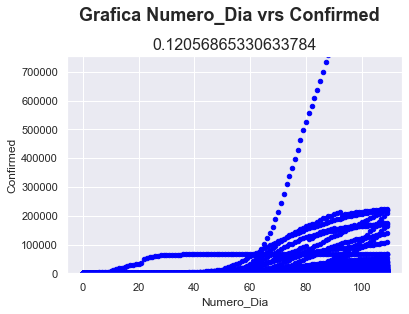

In [220]:
Correlacion1 = np.corrcoef(covid19_data["Numero_Dia"],covid19_data["Confirmed"])
covid19_data.plot.scatter(x='Numero_Dia', y='Confirmed', ylim=(0,755000), color='Blue');
plt.suptitle('Grafica Numero_Dia vrs Confirmed', size = 18, y=1.05, fontweight='bold')
plt.title(Correlacion1[0,1], fontsize=16)

In [244]:
x_entrenar = covid19_data_resumen[['Numero_Dia']]
y_entrenar = covid19_data_resumen[['Confirmed']]

In [240]:
def regresion_lineal(x, y, EPOCH, imprimir_error_cada, LEARNING_RATE):
    lr = 0.01
    errores_dict = {}
    modelos_dict = {}
    yhat = 0
        
    # Calcular media de set de entrenamiento
    media_X = x.mean()
    media_Y = y.mean()
    
   # Calcular pendiente
    m = sum( (x-media_X)*(y-media_Y) ) / sum( ((x - media_X) ** 2) ) 

    # Calcular intesección
    b = (media_Y - (m * media_X))

    # vector parametros
    parametros = [m, b]

    # Matrix de x con unos
    matriz_x = np.vstack((x, np.ones((1169,)) ))
    matriz_x = matriz_x.transpose()
    
    for i in range(epochs):
        # Predicción
        yhat = np.dot(matriz_x, parametros)
        
        # Version 2
        # yhat = ( parametros[0] * x ) + parametros[1]

        # Error MSE
        error = sum( np.square( (y - yhat) ) ) / len(y)
        
        # Version 2
        # error = 0.5 * np.mean( (y - yhat)**2 )
        
        errores_dict[i] = error

        # gradientes
        gradientes = [np.mean( (yhat -y) * x ), np.mean( (yhat - y ) * 1 ) ]
        
        # print(gradientes)

        # Guardar parametros de iteración actual antes de calcular nuevos parametros
        modelos_dict[i] = parametros

        # Obtener nuevos parametros
        parametros = np.multiply(gradientes, LEARNING_RATE) - parametros
        
        # version 2 nuevos parametros
        # m = parametros[0] - ( LEARNING_RATE * gradientes[0] )
        # b = parametros[1] - ( LEARNING_RATE * gradientes[1] )
        #parametros = [m, b]
        
        # print('parametros', m, b)
        
        # print(yhat[1])
    return modelos_dict, errores_dict

In [245]:
from sklearn.linear_model import LinearRegression

In [252]:
X_train, X_test, Y_train, Y_test= train_test_split(covid19_data_resumen.Numero_Dia.values.reshape(-1,1), covid19_data_resumen.Confirmed.values, test_size=0.20, random_state=42)

In [253]:
regresion_lineal_sl = LinearRegression()

In [254]:
regresion_lineal_sl.fit(X=x_entrenar, y=y_entrenar)

LinearRegression()

In [255]:
regresion_lineal_sl.coef_

array([[134.70638105]])

In [256]:
regresion_lineal_sl.intercept_

array([-3524.72624525])

In [257]:
prediccion = regresion_lineal_sl.predict(X_train)

In [258]:
esperado = Y_train

In [260]:
predice = (lambda x:regresion_lineal_sl.coef_*x + regresion_lineal_sl.intercept_)

In [261]:
predice (8)

array([[-2447.07519684]])

### Parte 2 - Modelo polinomial de calidad de vinos

In [138]:
#importación de librerias a utilizar
import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow as tf
from sklearn.preprocessing import PolynomialFeatures

#### Lectura de archivo a analizar

In [139]:
data = pd.read_csv('winequality-red.csv')

In [140]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [141]:
data.shape

(1599, 12)

In [142]:
data.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

#### Análisis Exploratorio de Data

In [143]:
data['quality'].describe()

count    1599.000000
mean        5.636023
std         0.807569
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         8.000000
Name: quality, dtype: float64

In [144]:
correlacion = data.corr()
correlacion

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


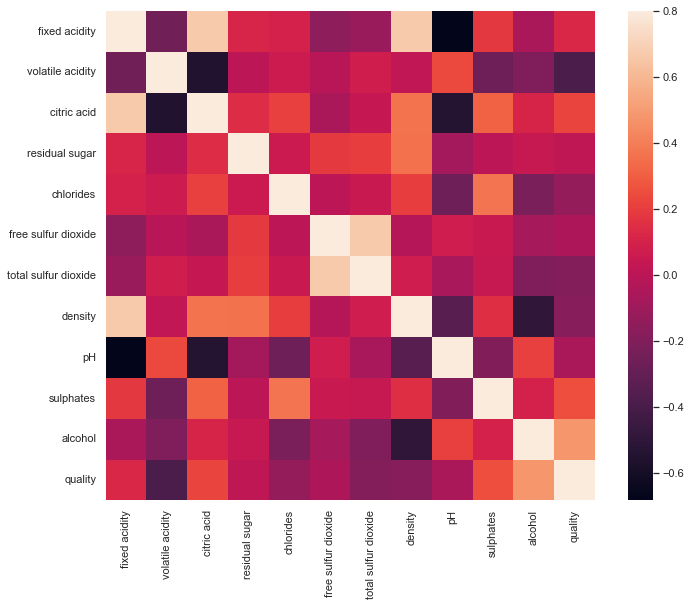

In [145]:
#Matriz de Correlacion
corrmat = data.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

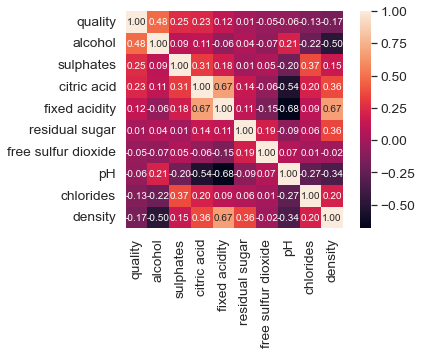

In [146]:
#Matriz de Correlación "Quality"
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'quality')['quality'].index
cm = np.corrcoef(data[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

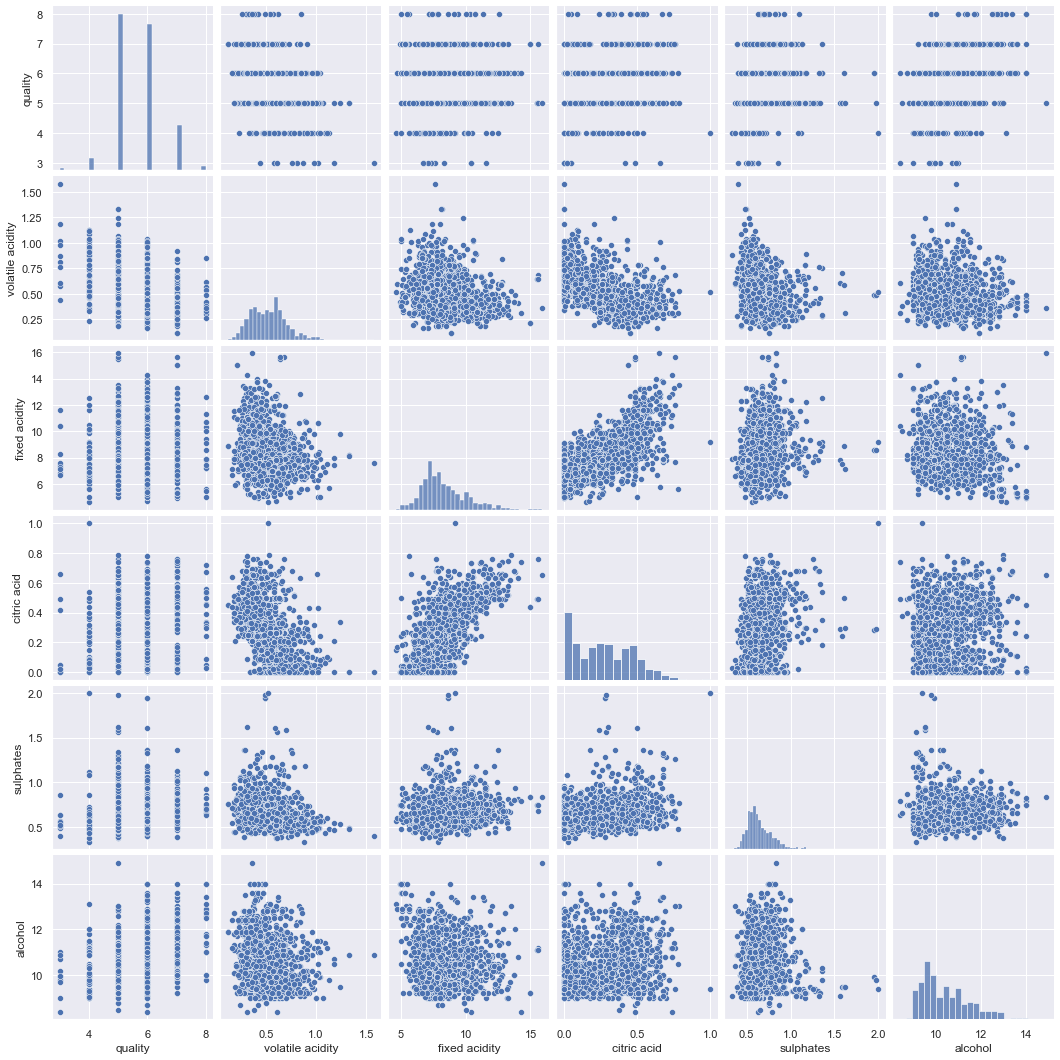

In [147]:
sns.set()
cols = ['quality', 'volatile acidity','fixed acidity', 'citric acid', 'sulphates', 'alcohol']
sns.pairplot(data[cols], height = 2.5)
plt.show();

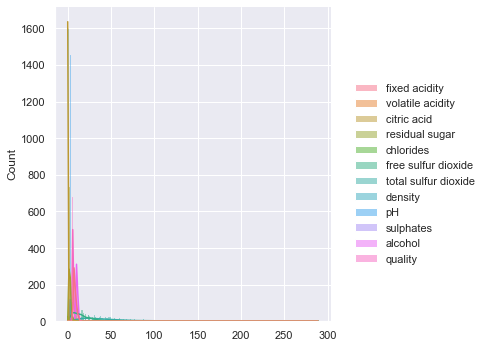

In [148]:
sns.displot(data, kde=True);

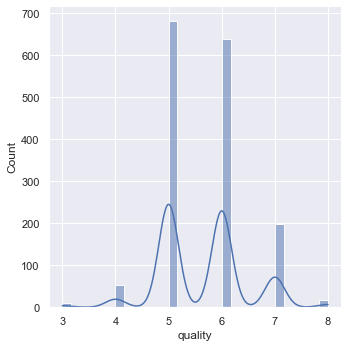

In [149]:
sns.displot(data["quality"], kde=True);

#### Regresion lineal con las features polinomiales usando Tensorflow.

In [150]:
import matplotlib.pyplot as plt

#### Selección y generación de las combinaciones polinomiales para un polinomio de grado dos.
##### Se seleccionan las variables **"alcohol"** y **"sulphates"**

In [151]:
# Se tienen las features "a" y "b" y seleccionamos polinomio de grado 2, hacemos feature engineering para obtener :
n = len(data)
a = np.array(data["alcohol"]).reshape(n,1)
b = np.array(data["sulphates"]).reshape(n,1)

#ab = np.multiply(a,b)
#a2 = np.multiply(a,a)
#b2 = np.multiply(b,b)

ab = tf.multiply(a,b, name = "AB")
a2 = tf.multiply(a,a, name = "A2")
b2 = tf.multiply(b,b, name = "B2")


# el "bias" (parámetro multiplicado por 1) ,con lo cual el dataset puede quedar con las columna
ones = np.ones(shape=[n,1])
#x = np.ndarray([[ones],[a],[b],[a2],[b2],[ab]])
#x = np.concatenate ([ones,a,b,a2,b2,ab], axis=1)
x = tf.concat ([ones,a,b,a2,b2,ab], axis=1)
y = np.array(data["quality"]).reshape(n,1)



In [152]:
# Se tienen las features "a" y "b" y seleccionamos polinomio de grado 2, hacemos feature engineering para obtener :
n = len(data)
a = np.array(data["alcohol"]).reshape(n,1)
b = np.array(data["sulphates"]).reshape(n,1)

ab = np.multiply(a,b)
a2 = np.multiply(a,a)
b2 = np.multiply(b,b)

# el "bias" (parámetro multiplicado por 1) ,con lo cual el dataset puede quedar con las columna
ones = np.ones(shape=[n,1])
#x = np.ndarray([[ones],[a],[b],[a2],[b2],[ab]])
x = np.concatenate ([ones,a,b,a2,b2,ab], axis=1)
y = np.array(data["quality"]).reshape(n,1)

#x = tf.concat ([ones,a,b,a2,b2,ab], axis=1)

In [153]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

#### Regresion lineal con las features polinomiales usando Tensorflow.

In [154]:
#tf.reset_default_graph()
tf.compat.v1.reset_default_graph()
g = tf.Graph()
with g.as_default():
    X = tf.placeholder("float", [None,6], name="X")
    Y = tf.placeholder("float", [None,1], name="Y")
    learning_rate = tf.placeholder("float")
    W = tf.Variable(tf.zeros((6,1)), name = "W", dtype="float")
    b = tf.Variable(tf.zeros(1), name = "b", dtype="float")
    with tf.name_scope("model"):
        y_pred = tf.add(tf.matmul(X,W), b)
    with tf.name_scope("cost"):
        cost = tf.reduce_sum(tf.pow(y_pred-Y, 2)) / (2*n)
        cost_summary = tf.summary.scalar("cost", cost)
    optimizer = tf.compat.v1.train.GradientDescentOptimizer(learning_rate).minimize(cost)
    init = tf.global_variables_initializer()

In [167]:
def training(lr):
    tf.reset_default_graph()
    
    with tf.Session(graph=g) as sess:
        
        writer = tf.summary.FileWriter('./graph/lr='+str(lr)+"polinomio=2", sess.graph)
        sess.run(init)
        for epoch in range(51):
                                       
            sess.run(optimizer, feed_dict = {X : x, Y : y, learning_rate:lr})
                                       
            if (epoch+1) % 10 == 0:
                c,co,we,inte=sess.run([cost_summary,cost,W,b], feed_dict = {X : x, Y : y, learning_rate:lr})
            
                writer.add_summary(c, epoch+1)
                print("Epoch", (epoch + 1), ": cost= ", co, "W = ", we, "b = ", inte)
                                       
        writer.close()

In [156]:
training(0.0001)

Epoch 10 : cost=  0.55924326 Pendiente =  [[0.00059079]
 [0.00543994]
 [0.00040555]
 [0.04910701]
 [0.00029997]
 [0.00376215]] Intercepto =  [0.00059079]
Epoch 20 : cost=  0.5578726 Pendiente =  [[0.00075186]
 [0.00630636]
 [0.00052659]
 [0.04897805]
 [0.00039985]
 [0.00448807]] Intercepto =  [0.00075186]
Epoch 30 : cost=  0.55650973 Pendiente =  [[0.00091262]
 [0.00717115]
 [0.00064724]
 [0.04884931]
 [0.00049923]
 [0.00521097]] Intercepto =  [0.00091262]
Epoch 40 : cost=  0.5551544 Pendiente =  [[0.00107309]
 [0.00803435]
 [0.0007675 ]
 [0.04872091]
 [0.00059812]
 [0.00593088]] Intercepto =  [0.00107309]
Epoch 50 : cost=  0.55380654 Pendiente =  [[0.00123326]
 [0.00889594]
 [0.00088736]
 [0.04859286]
 [0.00069652]
 [0.00664779]] Intercepto =  [0.00123326]


In [157]:
training(0.001)

Epoch 10 : cost=  3.9269177e+22 Pendiente =  [[-2.1512484e+07]
 [-2.2903451e+08]
 [-1.4233377e+07]
 [-2.4665464e+09]
 [-9.9989440e+06]
 [-1.5195141e+08]] Intercepto =  [-21512482.]
Epoch 20 : cost=  inf Pendiente =  [[-1.07768605e+18]
 [-1.14736842e+19]
 [-7.13032947e+17]
 [-1.23563732e+20]
 [-5.00905509e+17]
 [-7.61213615e+18]] Intercepto =  [-1.07768605e+18]
Epoch 30 : cost=  inf Pendiente =  [[-5.3987534e+28]
 [-5.7478299e+29]
 [-3.5719938e+28]
 [-6.1900206e+30]
 [-2.5093253e+28]
 [-3.8133593e+29]] Intercepto =  [-5.398752e+28]
Epoch 40 : cost=  nan Pendiente =  [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]] Intercepto =  [nan]
Epoch 50 : cost=  nan Pendiente =  [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]] Intercepto =  [nan]


In [158]:
training(0.01)

Epoch 10 : cost=  inf Pendiente =  [[-4.5004715e+17]
 [-4.7914655e+18]
 [-2.9776613e+17]
 [-5.1600820e+19]
 [-2.0918066e+17]
 [-3.1788665e+18]] Intercepto =  [-4.5004715e+17]
Epoch 20 : cost=  nan Pendiente =  [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]] Intercepto =  [nan]
Epoch 30 : cost=  nan Pendiente =  [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]] Intercepto =  [nan]
Epoch 40 : cost=  nan Pendiente =  [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]] Intercepto =  [nan]
Epoch 50 : cost=  nan Pendiente =  [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]] Intercepto =  [nan]


In [159]:
training(0.1)

Epoch 10 : cost=  inf Pendiente =  [[-4.8311556e+27]
 [-5.1435322e+28]
 [-3.1964536e+27]
 [-5.5392331e+29]
 [-2.2455074e+27]
 [-3.4124420e+28]] Intercepto =  [-4.831155e+27]
Epoch 20 : cost=  nan Pendiente =  [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]] Intercepto =  [nan]
Epoch 30 : cost=  nan Pendiente =  [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]] Intercepto =  [nan]
Epoch 40 : cost=  nan Pendiente =  [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]] Intercepto =  [nan]
Epoch 50 : cost=  nan Pendiente =  [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]] Intercepto =  [nan]


In [160]:
training(0.00001)

Epoch 10 : cost=  1.583571 Pendiente =  [[0.00033577]
 [0.00348975]
 [0.00022363]
 [0.03663378]
 [0.00015862]
 [0.00233064]] Intercepto =  [0.00033577]
Epoch 20 : cost=  0.6272379 Pendiente =  [[0.00043364]
 [0.00444672]
 [0.00028986]
 [0.04599142]
 [0.00020666]
 [0.0029809 ]] Intercepto =  [0.00043364]
Epoch 30 : cost=  0.56458104 Pendiente =  [[0.00047068]
 [0.00475605]
 [0.00031584]
 [0.04837454]
 [0.00022642]
 [0.00320146]] Intercepto =  [0.00047068]
Epoch 40 : cost=  0.56035537 Pendiente =  [[0.00049217]
 [0.00489976]
 [0.00033152]
 [0.04897428]
 [0.00023894]
 [0.00331213]] Intercepto =  [0.00049217]
Epoch 50 : cost=  0.55995023 Pendiente =  [[0.00050967]
 [0.00500111]
 [0.00034457]
 [0.04911799]
 [0.00024962]
 [0.00339468]] Intercepto =  [0.00050967]


In [161]:
training(0.0001501)

Epoch 10 : cost=  3.1230655 Pendiente =  [[0.00049769]
 [0.00402341]
 [0.00035124]
 [0.02910973]
 [0.00026928]
 [0.00289838]] Intercepto =  [0.00049769]
Epoch 20 : cost=  0.9768063 Pendiente =  [[0.00084259]
 [0.00642371]
 [0.00060094]
 [0.04077959]
 [0.00046675]
 [0.00471553]] Intercepto =  [0.00084259]
Epoch 30 : cost=  0.6233585 Pendiente =  [[0.00112523]
 [0.00816477]
 [0.00080903]
 [0.04538963]
 [0.00063449]
 [0.00609095]] Intercepto =  [0.00112523]
Epoch 40 : cost=  0.5637495 Pendiente =  [[0.00138228]
 [0.00963682]
 [0.00099975]
 [0.04714207]
 [0.00078953]
 [0.00728356]] Intercepto =  [0.00138228]
Epoch 50 : cost=  0.5523123 Pendiente =  [[0.00162856]
 [0.01099783]
 [0.00118292]
 [0.04773811]
 [0.00093879]
 [0.0083982 ]] Intercepto =  [0.00162856]


In [162]:
training(0.000001)

Epoch 10 : cost=  12.666736 Pendiente =  [[5.3324013e-05]
 [5.5921177e-04]
 [3.5428468e-05]
 [5.9274766e-03]
 [2.5040137e-05]
 [3.7254466e-04]] Intercepto =  [5.3324013e-05]
Epoch 20 : cost=  9.926762 Pendiente =  [[1.0042150e-04]
 [1.0521326e-03]
 [6.6737244e-05]
 [1.1141045e-02]
 [4.7186175e-05]
 [7.0110877e-04]] Intercepto =  [0.00010042]
Epoch 30 : cost=  7.806916 Pendiente =  [[1.4204223e-04]
 [1.4867447e-03]
 [9.4422394e-05]
 [1.5726671e-02]
 [6.6786597e-05]
 [9.9098822e-04]] Intercepto =  [0.00014204]
Epoch 40 : cost=  6.1668496 Pendiente =  [[1.78845672e-04]
 [1.87006942e-03]
 [1.18920245e-04]
 [1.97599679e-02]
 [8.41479123e-05]
 [1.24684116e-03]] Intercepto =  [0.00017885]
Epoch 50 : cost=  4.897974 Pendiente =  [[2.1141187e-04]
 [2.2082820e-03]
 [1.4061460e-04]
 [2.3307445e-02]
 [9.9539742e-05]
 [1.4727646e-03]] Intercepto =  [0.00021141]


In [163]:
training(0.05)

Epoch 10 : cost=  inf Pendiente =  [[-4.6810152e+24]
 [-4.9836835e+25]
 [-3.0971164e+24]
 [-5.3670887e+26]
 [-2.1757233e+24]
 [-3.3063923e+25]] Intercepto =  [-4.681016e+24]
Epoch 20 : cost=  nan Pendiente =  [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]] Intercepto =  [nan]
Epoch 30 : cost=  nan Pendiente =  [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]] Intercepto =  [nan]
Epoch 40 : cost=  nan Pendiente =  [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]] Intercepto =  [nan]
Epoch 50 : cost=  nan Pendiente =  [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]] Intercepto =  [nan]


In [164]:
training(0.005)

Epoch 10 : cost=  inf Pendiente =  [[-4.0596222e+14]
 [-4.3221126e+15]
 [-2.6859828e+14]
 [-4.6546223e+16]
 [-1.8869023e+14]
 [-2.8674772e+15]] Intercepto =  [-4.0596236e+14]
Epoch 20 : cost=  inf Pendiente =  [[-3.8377998e+32]
 [-4.0859483e+33]
 [-2.5392173e+32]
 [-4.4002881e+34]
 [-1.7837993e+32]
 [-2.7107950e+33]] Intercepto =  [-3.8378014e+32]
Epoch 30 : cost=  nan Pendiente =  [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]] Intercepto =  [nan]
Epoch 40 : cost=  nan Pendiente =  [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]] Intercepto =  [nan]
Epoch 50 : cost=  nan Pendiente =  [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]] Intercepto =  [nan]


In [165]:
training(0.005)

Epoch 10 : cost=  inf Pendiente =  [[-4.0596222e+14]
 [-4.3221126e+15]
 [-2.6859828e+14]
 [-4.6546223e+16]
 [-1.8869023e+14]
 [-2.8674772e+15]] Intercepto =  [-4.0596236e+14]
Epoch 20 : cost=  inf Pendiente =  [[-3.8377998e+32]
 [-4.0859483e+33]
 [-2.5392173e+32]
 [-4.4002881e+34]
 [-1.7837993e+32]
 [-2.7107950e+33]] Intercepto =  [-3.8378014e+32]
Epoch 30 : cost=  nan Pendiente =  [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]] Intercepto =  [nan]
Epoch 40 : cost=  nan Pendiente =  [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]] Intercepto =  [nan]
Epoch 50 : cost=  nan Pendiente =  [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]] Intercepto =  [nan]


In [166]:
training(0.5)

Epoch 10 : cost=  inf Pendiente =  [[-4.7476342e+34]
 [-5.0546106e+35]
 [-3.1411924e+34]
 [-5.4434691e+36]
 [-2.2066873e+34]
 [-3.3534477e+35]] Intercepto =  [-4.7476347e+34]
Epoch 20 : cost=  nan Pendiente =  [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]] Intercepto =  [nan]
Epoch 30 : cost=  nan Pendiente =  [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]] Intercepto =  [nan]
Epoch 40 : cost=  nan Pendiente =  [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]] Intercepto =  [nan]
Epoch 50 : cost=  nan Pendiente =  [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]] Intercepto =  [nan]


### Imagen de Scalar

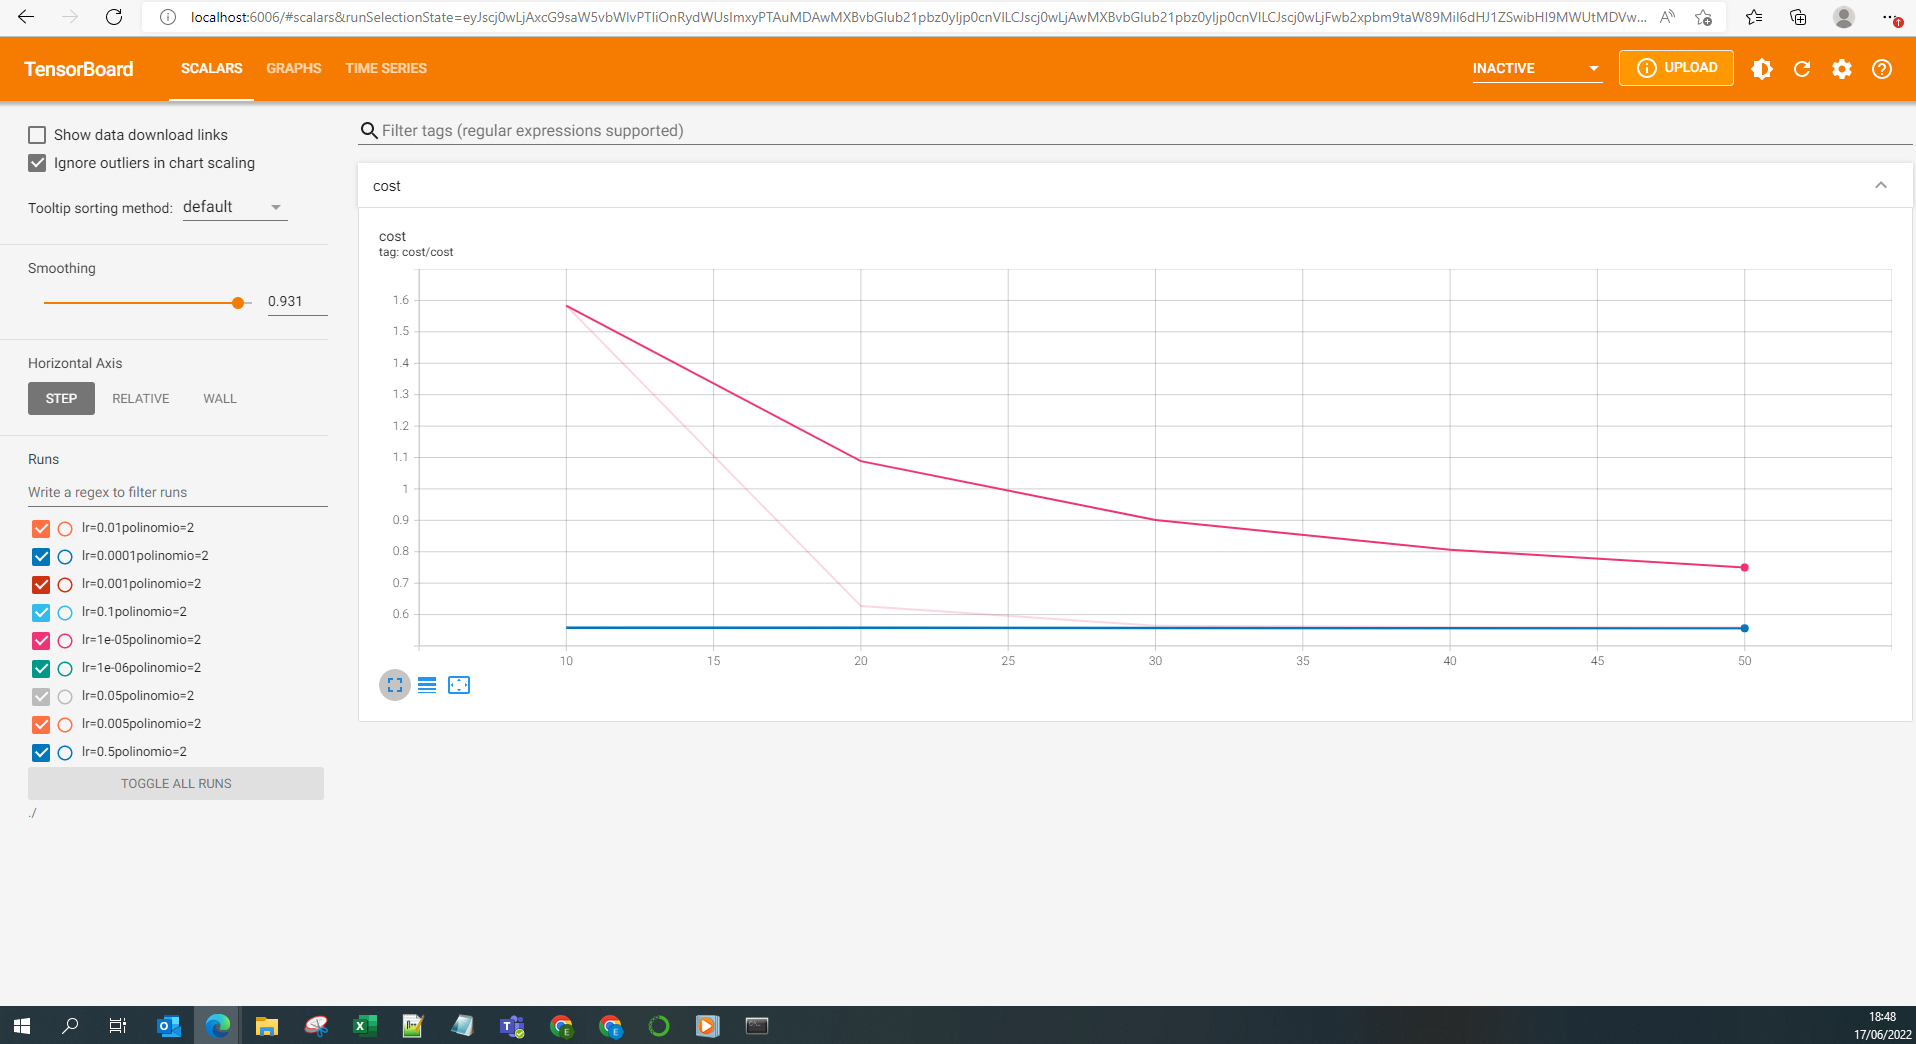

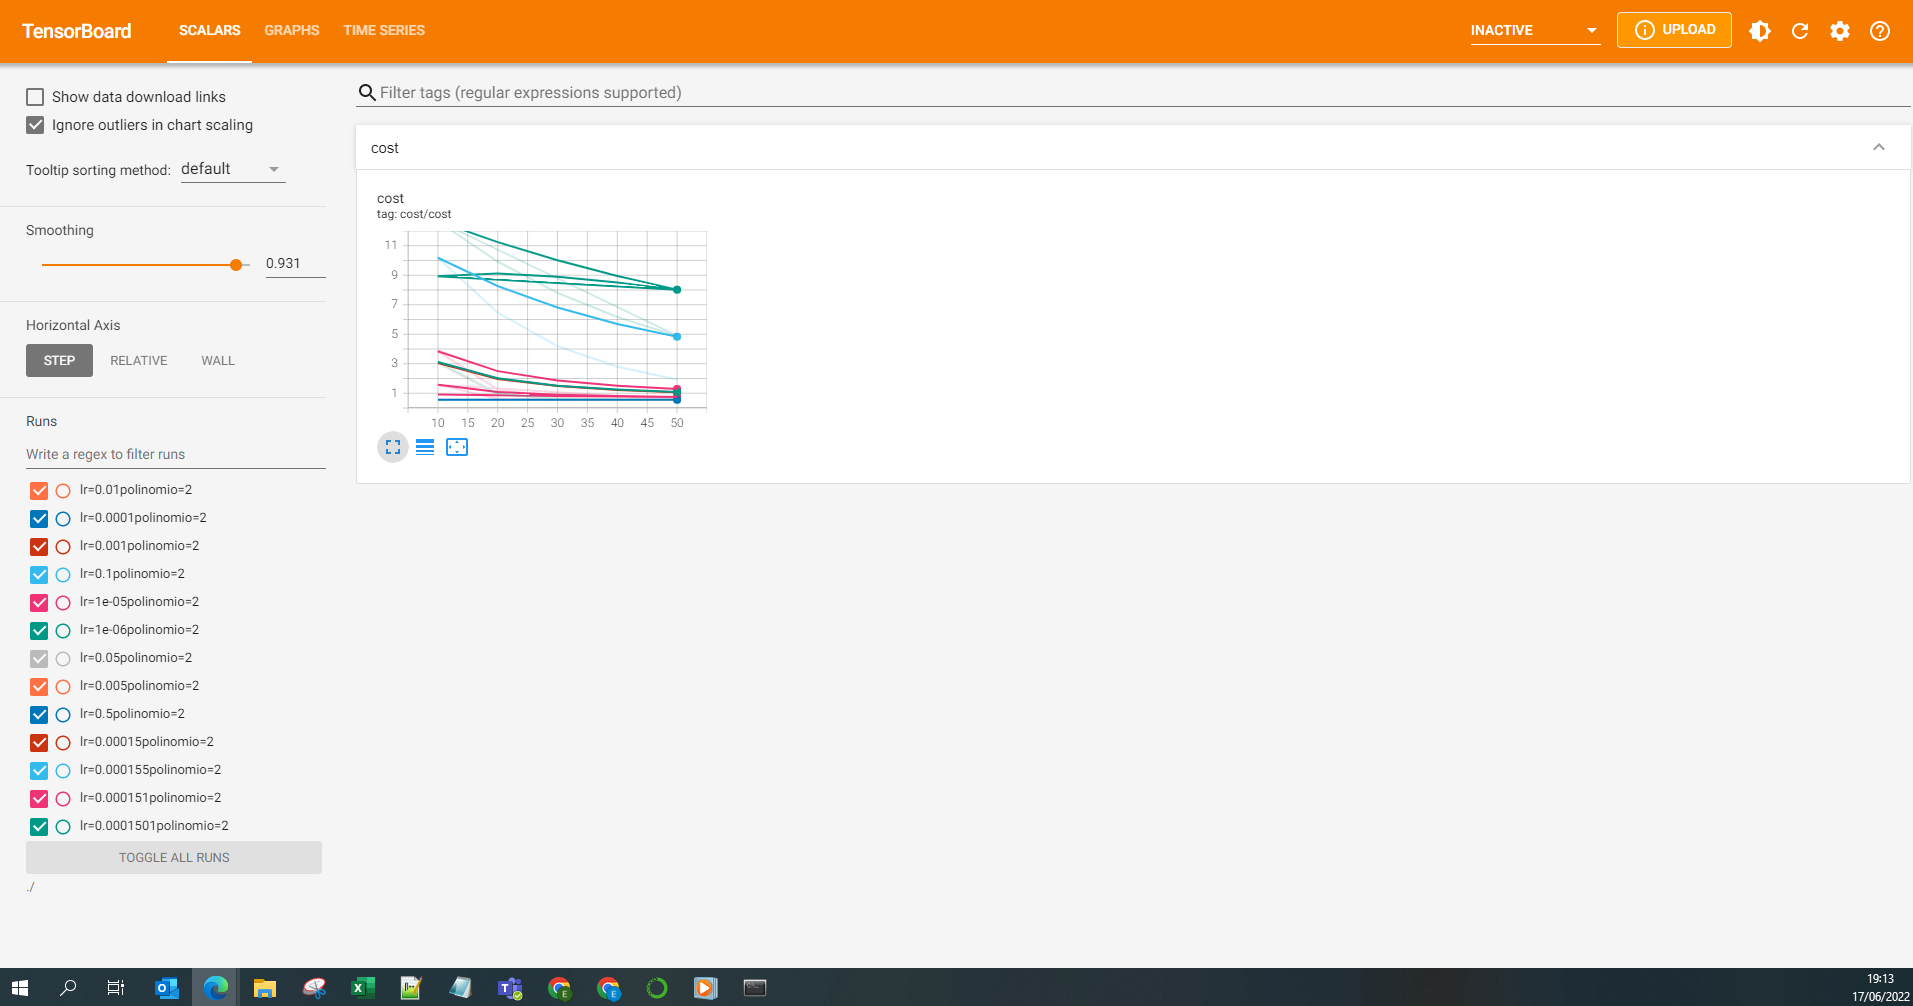

### Imagen de Grafo

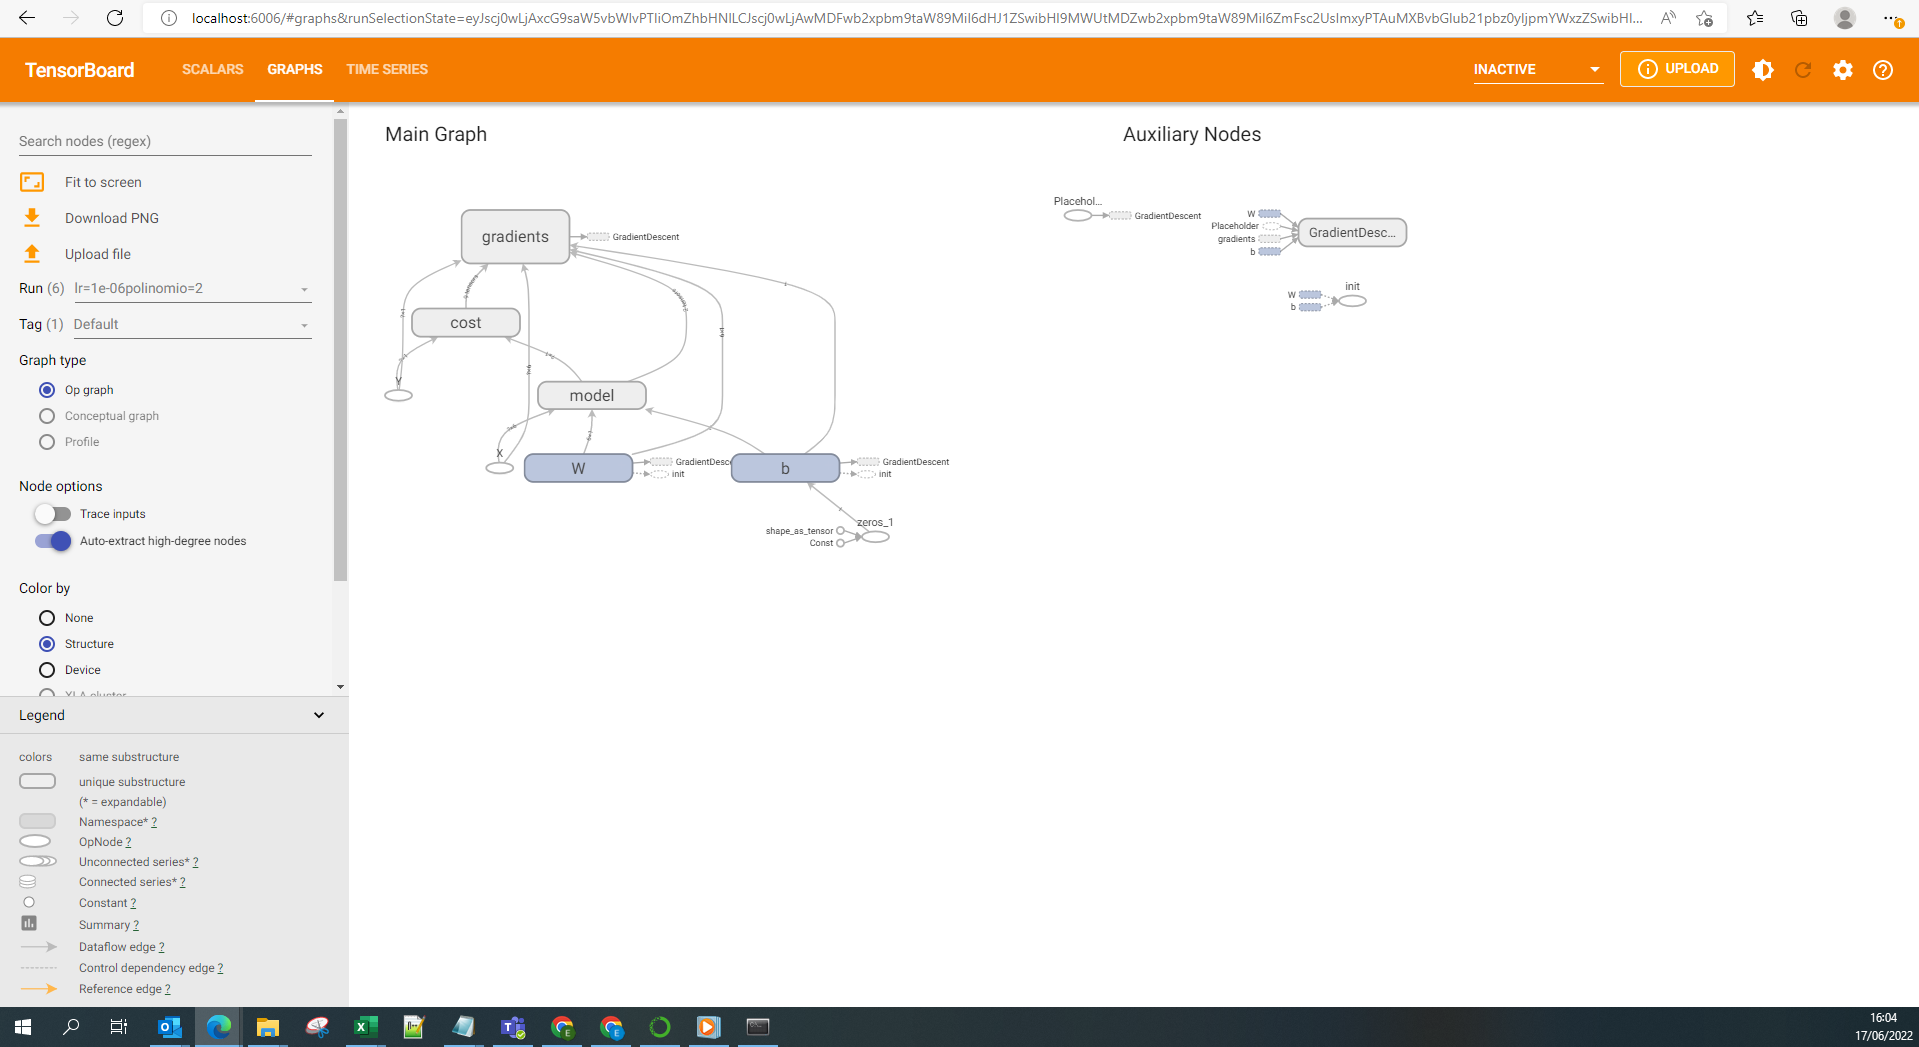

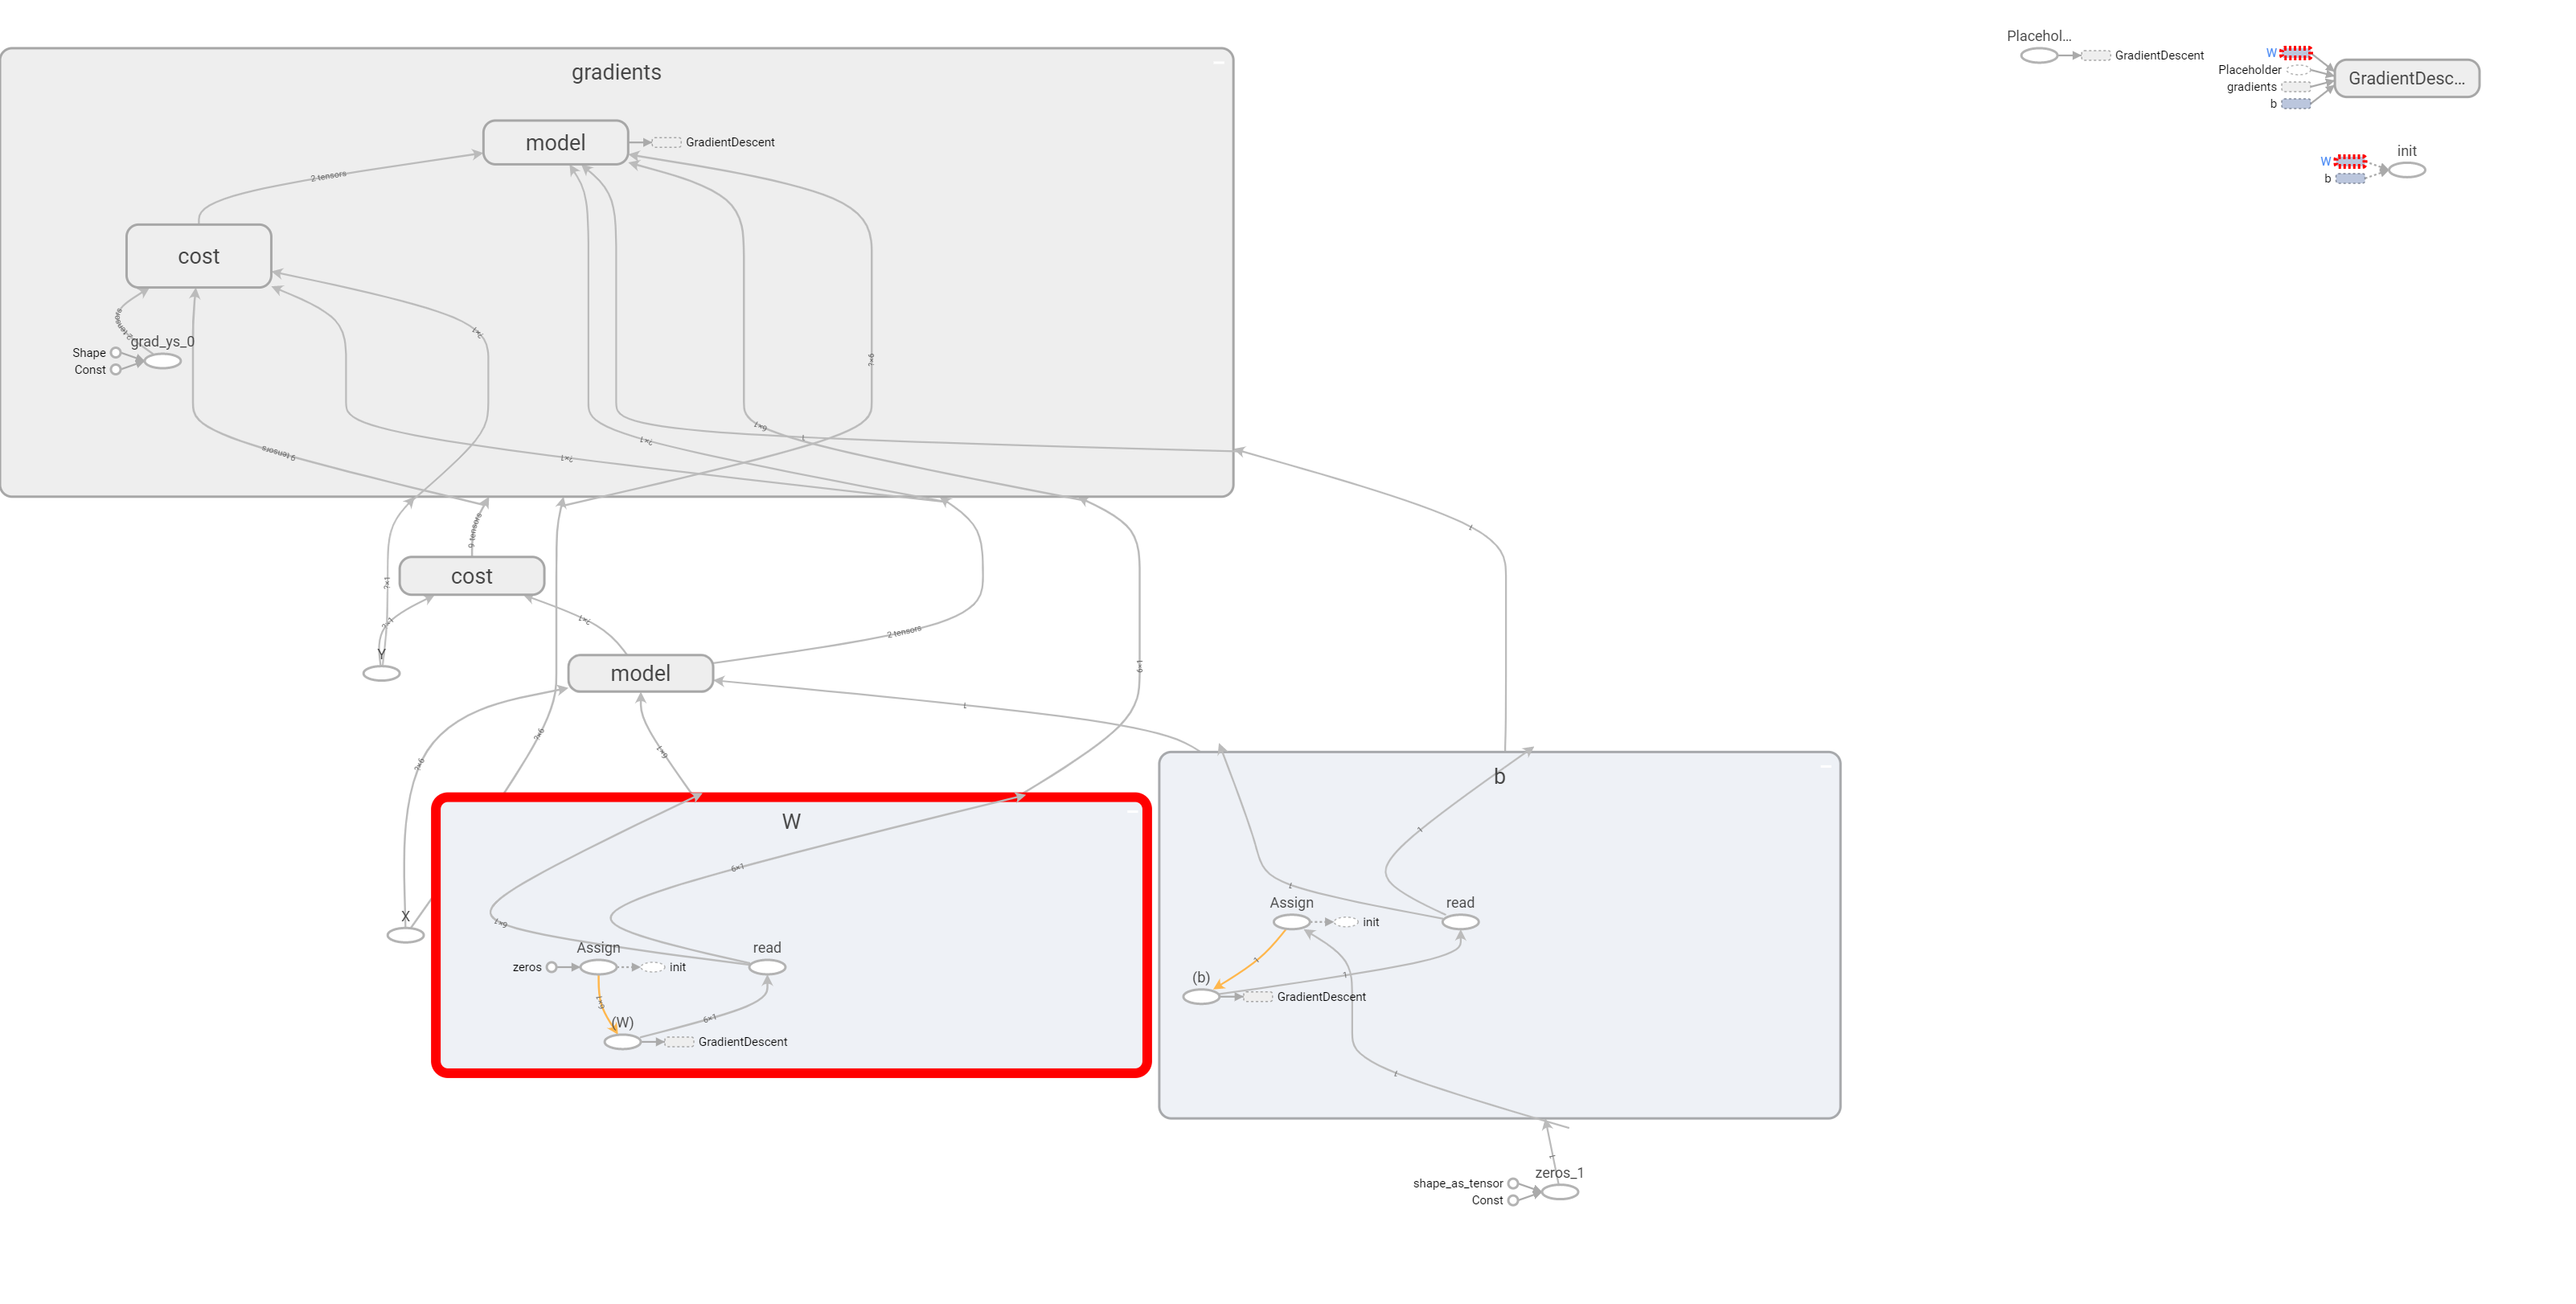

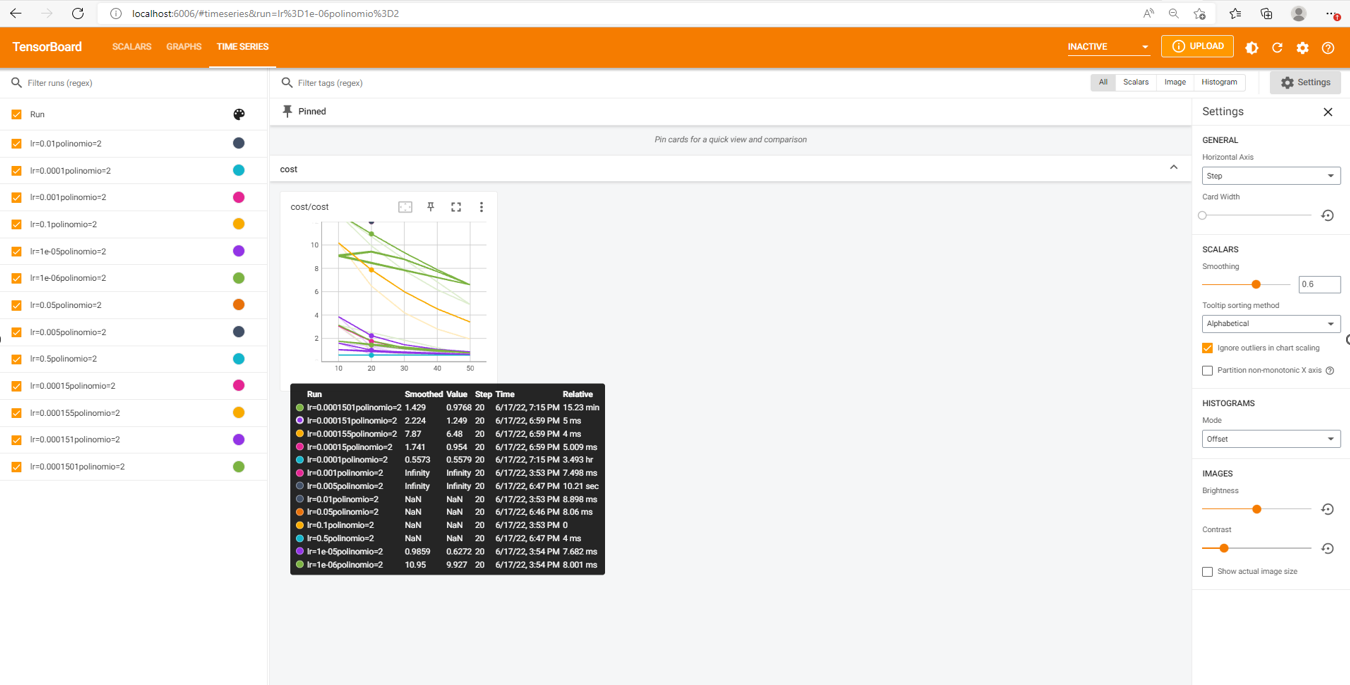

### Imagen Directorio de Logs

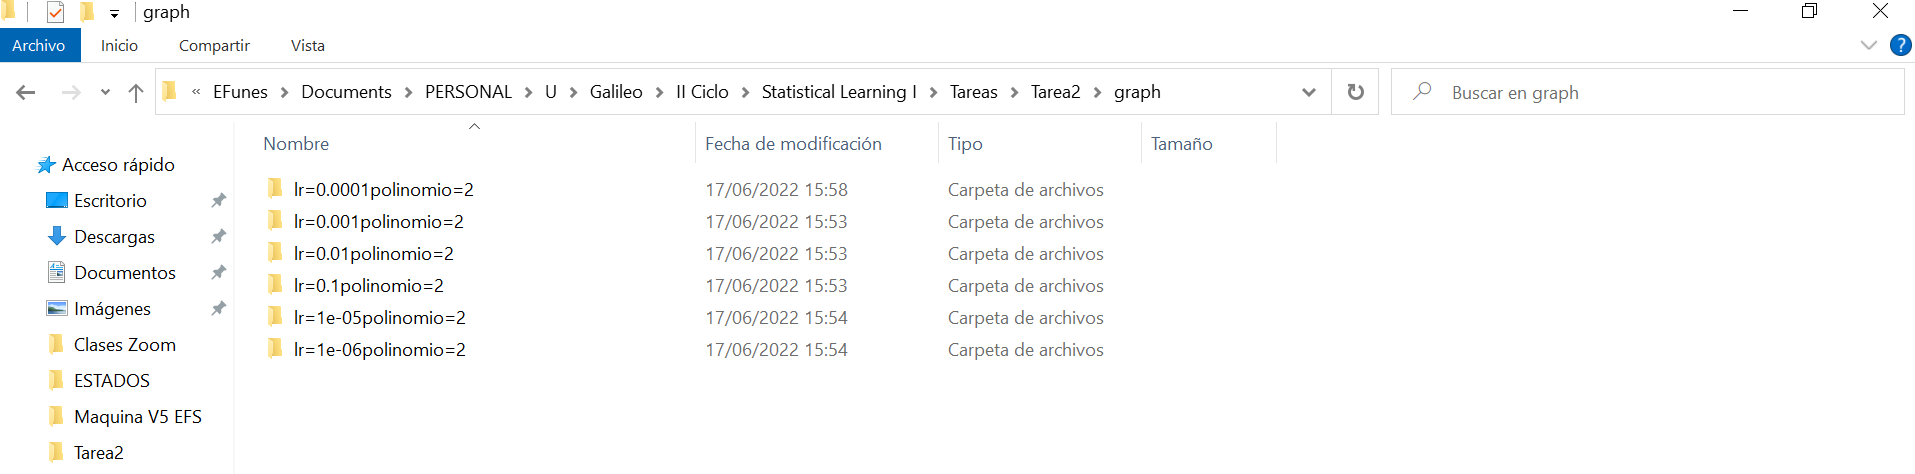

### Conclusiones

1. Después de hacer diferentes pruebas con distintos learnings rate, vemos que con el que se obtiene mejor resultado es 0.0001 y 0.00001
2. Utilizando cualquiera de los dos learning rates anteriores (0.0001 o 0.00001) el error no baja de 0.5538 y 0.5599 por lo que cualquiera es bueno utilizar
3. Incluso utilizando un Learning Rate de 0.0001501 el error llego a 0.5523. 
4. Con estos Learning Rates la respuesta es bastante rápida.
5. Se hizo una prueba con Learning Rates de 0.5 pero toma mucho tiempo y los valores devuelven NaN.


**_Conclusión general es mejor el modelo polinomial_**
